In [1]:
import pykep as pk
from pykep.orbit_plots import plot_planet
from pykep.planet import tle, keplerian

import numpy as np
import pandas as pd


import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def start_plot():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(0, 0, 0, color='green', label="Earth")
    plt.ion()
    return ax

In [3]:
start_time = pk.epoch(6600, "mjd2000")

old_osculating_parameters = (7800, 0.001, 0.017453292519943295, 0, 0, 0)
new_osculating_parameters = (7800000, 0.001, 0.017453292519943295, 0, 0, 0)

old_mu_central_body, old_mu_self, old_radius, old_safe_radius = 0.1, 0.1, 0.1, 0.1
old = [old_mu_central_body, old_mu_self, old_radius, old_safe_radius]
new_mu_central_body, new_mu_self, new_radius, new_safe_radius = 398600800000000, 0.1, 0.1, 0.1
new = [new_mu_central_body, new_mu_self, new_radius, new_safe_radius]

In [4]:
old_satellite = keplerian(start_time, old_osculating_parameters,*old, "OLD")
new_satellite = keplerian(start_time, new_osculating_parameters,*new, "NEW")

In [5]:
old_satellite

Planet Name: OLD
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 0.10000000000000001
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830673e-08
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2018-Jan-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792.1999999999998, 0, 0]
v at ref. = [0, 0.0035836108522149341, 6.2552160102876832e-05]

In [6]:
print("A:{}\ne:{}\nw:{}\n{}\n{}\n{}".format(*old_satellite.osculating_elements(start_time)))

A:7800.000000000002
e:0.001000000000000112
w:0.017453292519941554
0.0
0.0
0.0


In [7]:
ax = start_plot()
plot_planet(old_satellite, ax=ax, t0=start_time, legend=True, color="black")

In [8]:
new_satellite

Planet Name: NEW
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2018-Jan-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 7154.6752521846111, 124.88532106719391]

In [9]:
print("A:{}\ne:{}\nw:{}\n{}\n{}\n{}".format(*new_satellite.osculating_elements(start_time)))

A:7800000.000000002
e:0.001000000000000334
w:0.017453292519947913
0.0
0.0
0.0


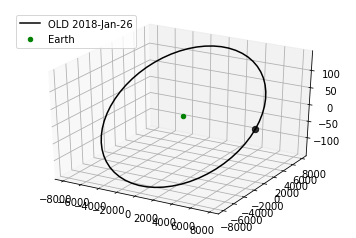

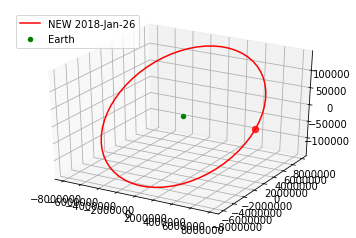

In [10]:
ax = start_plot()
plot_planet(new_satellite, ax=ax, t0=start_time, legend=True, color="red")

## OLD vs. NEW

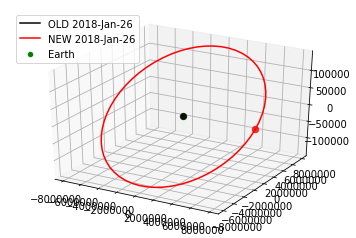

In [11]:
ax = start_plot()
plot_planet(old_satellite, ax=ax, t0=start_time, legend=True, color="black")
plot_planet(new_satellite, ax=ax, t0=start_time, legend=True, color="red")

### Try different initial parameteres for keplerian object

Check, if different parameteres could affect the satellite.

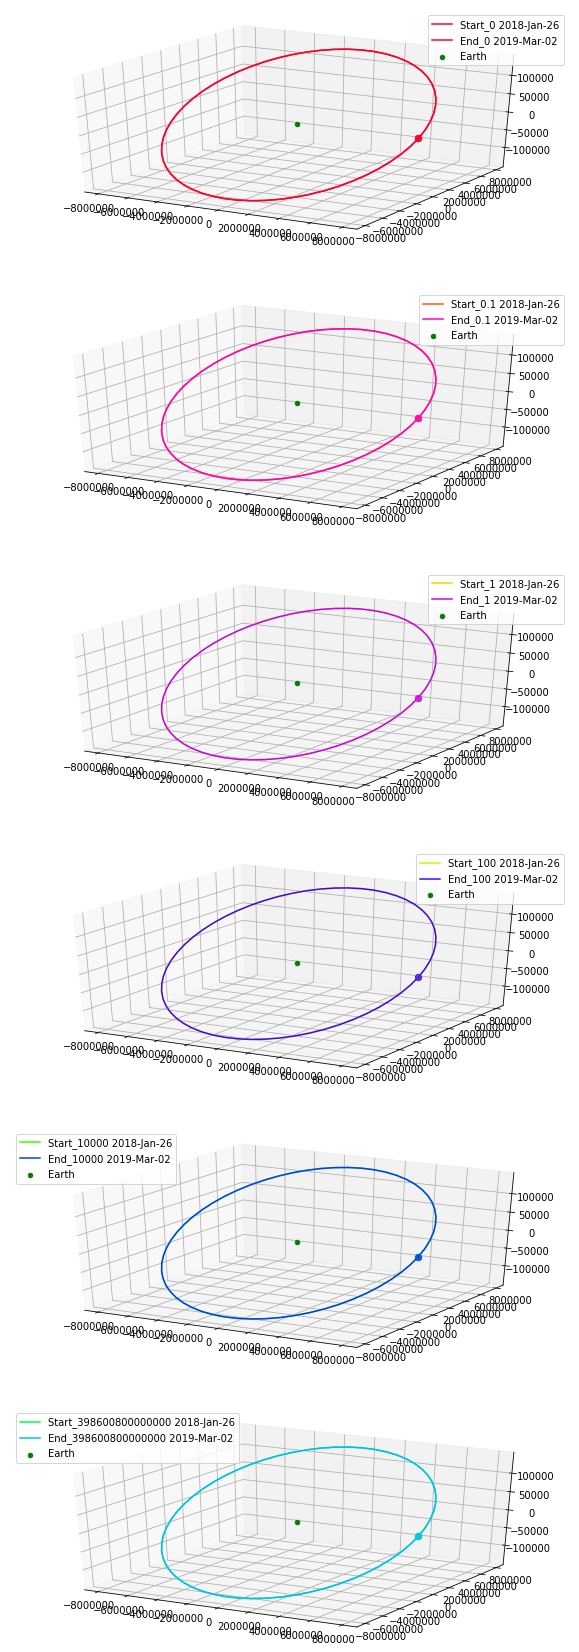

In [28]:
osculating_parameters = (7800000, 0.001, 0.017453292519943295, 0, 0, 0)

mu_central_body, radius, safe_radius = 398600800000000, 0.1, 0.1 # : GM


mu_selfs = [0, 0.1, 1, 100, 10000, 398600800000000]

fig, axes = plt.subplots(len(mu_selfs), subplot_kw=dict(projection='3d'), figsize=(10, 30))

# fig.figsize((20, 15))


cmap = plt.get_cmap('gist_rainbow')
n_items = len(mu_selfs)

colors = [cmap(i) for i in np.linspace(0, 1, 2 * n_items)]

satellites = []

end_time = pk.epoch(7000)

for i, mu_self in enumerate(mu_selfs):
    axes[i].scatter(0, 0, 0, color='green', label="Earth")
    params = [mu_central_body, mu_self, radius, safe_radius]
    satellite = keplerian(start_time, osculating_parameters, *params, "Start_{}".format(mu_self))
    plot_planet(satellite, ax=axes[i], t0=start_time, legend=True, color=colors[i])
    satellite = keplerian(end_time, osculating_parameters, *params, "End_{}".format(mu_self))
    satellites.append(satellite)
    plot_planet(satellite, ax=axes[i], t0=end_time, legend=True, color=colors[-i])

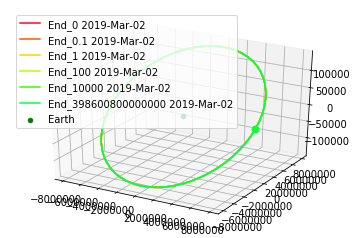

In [29]:
ax = start_plot()
for i, satellite in enumerate(satellites):
    plot_planet(satellite, ax=ax, t0=end_time, legend=True, color=colors[i])

In [31]:
for i, satellite in enumerate(satellites):
    print("mu_self == {}".format(mu_selfs[i]))
    print(satellite)

mu_self == 0
Planet Name: End_0
Own gravity parameter: 0
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2019-Mar-02 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 7154.6752521846111, 124.88532106719391]

mu_self == 0.1
Planet Name: End_0.1
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2019-Mar-02 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0

Видимо явной разницы для mu_self в движении нет

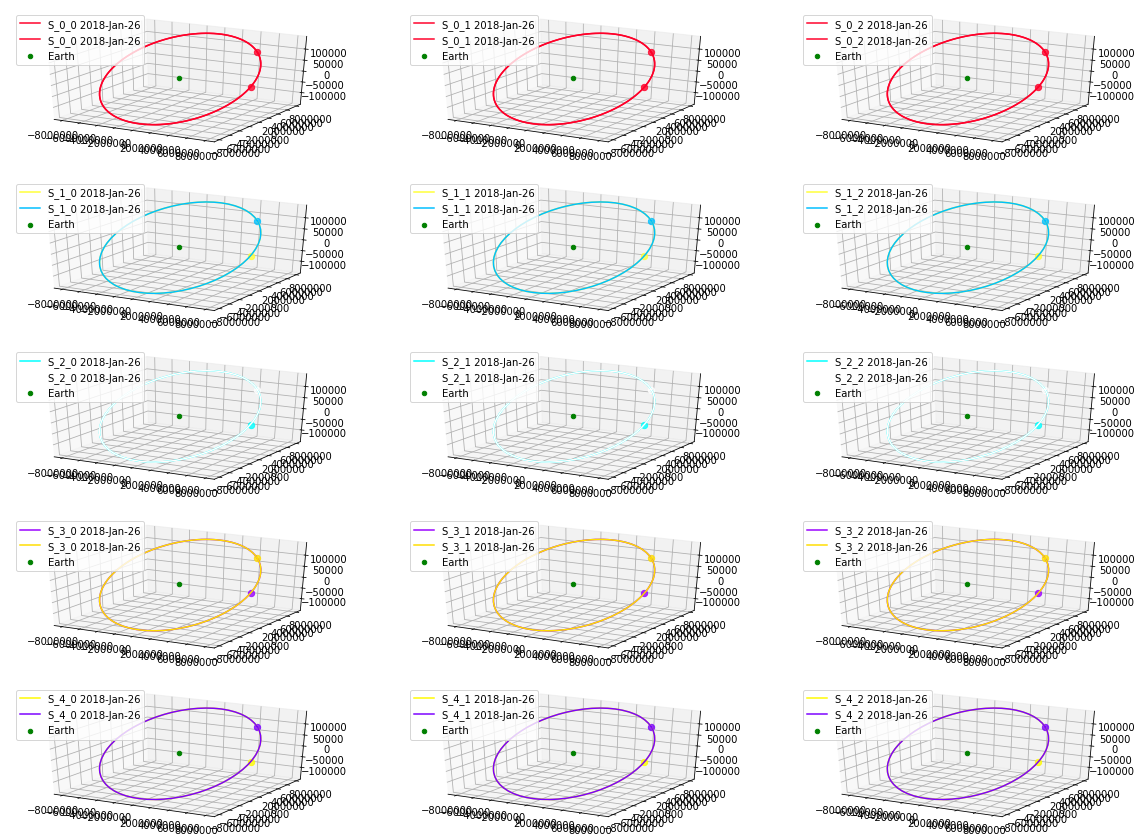

In [32]:
osculating_parameters = (7800000, 0.001, 0.017453292519943295, 0, 0, 0)

mu_central_body, safe_radius = 398600800000000, 0.1 # : GM

mu_selfs = [0, 0.1, 1, 100, 398600800000000]
radiuses = [0.1, 1, 100]

fig, axes = plt.subplots(len(mu_selfs), len(radiuses), subplot_kw=dict(projection='3d'), figsize=(20, 15))

# fig.figsize((20, 15))



cmap = plt.get_cmap('gist_rainbow')
n_items = len(mu_selfs) * len(radiuses)

colors = np.array([cmap(i) for i in np.linspace(0, 1, n_items)]).reshape((len(mu_selfs) * 4,len(radiuses)))

satellites = []

end_time = pk.epoch(6600.01)

for i, mu_self in enumerate(mu_selfs):
    for j, radius in enumerate(radiuses):
        axes[i][j].scatter(0, 0, 0, color='green', label="Earth")
        params = [mu_central_body, mu_self, radius, radius]
        satellite = keplerian(start_time, osculating_parameters, *params, "S_{}_{}".format(i, j))
        satellites.append(satellite)
        plot_planet(satellite, ax=axes[i][j], t0=start_time, legend=True, color=colors[i])
        plot_planet(satellite, ax=axes[i][j], t0=end_time, legend=True, color=colors[-i])


Так же как и радиус не влияет на движение объекта.

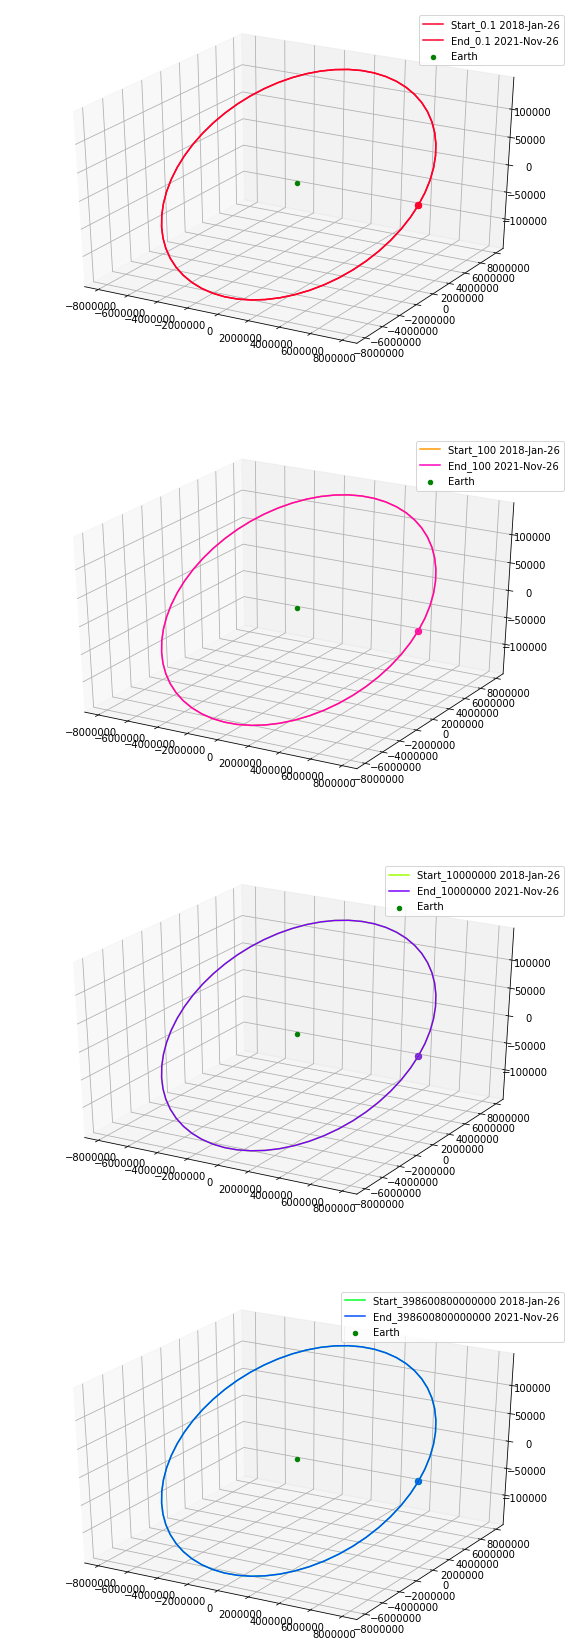

In [33]:
osculating_parameters = (7800000, 0.001, 0.017453292519943295, 0, 0, 0)

mu_self, radius, safe_radius = 0.1, 0.1, 0.1 # : GM

mu_central_bodys = [0.1, 100, 10000000, 398600800000000]

fig, axes = plt.subplots(len(mu_central_bodys), subplot_kw=dict(projection='3d'), figsize=(10, 30))

# fig.figsize((20, 15))


cmap = plt.get_cmap('gist_rainbow')
n_items = len(mu_central_bodys)

colors = [cmap(i) for i in np.linspace(0, 1, 2 * n_items)]

satellites = []

end_time = pk.epoch(8000)

for i, mu_central_body in enumerate(mu_central_bodys):
    axes[i].scatter(0, 0, 0, color='green', label="Earth")
    params = [mu_central_body, mu_self, radius, safe_radius]
    satellite = keplerian(start_time, osculating_parameters, *params, "Start_{}".format(mu_central_body))
    plot_planet(satellite, ax=axes[i], t0=start_time, legend=True, color=colors[i])
    satellite = keplerian(end_time, osculating_parameters, *params, "End_{}".format(mu_central_body))
    satellites.append(satellite)
    plot_planet(satellite, ax=axes[i], t0=end_time, legend=True, color=colors[-i])

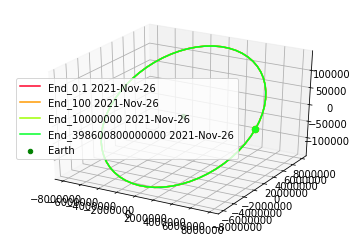

In [34]:
ax = start_plot()
for i, satellite in enumerate(satellites):
    plot_planet(satellite, ax=ax, t0=end_time, legend=True, color=colors[i])

In [35]:
for i, satellite in enumerate(satellites):
    print("mu_central_body == {}".format(mu_central_bodys[i]))
    print(satellite)

mu_central_body == 0.1
Planet Name: End_0.1
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 0.10000000000000001
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2021-Nov-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 0.00011332372540696254, 1.9780729848860316e-06]

mu_central_body == 100
Planet Name: End_100
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 100
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2021-Nov-26 00:00:00
Ephemerides t

Есть различия в скоростях (v)

### Try different actions

Check, if different actions seems ok.

In [36]:
from pykep import AU, G0, EARTH_VELOCITY

In [37]:
print(AU, G0, EARTH_VELOCITY)

149597870691.0 9.80665 29784.6905


In [38]:
new_satellite = keplerian(start_time, new_osculating_parameters,*new, "NEW")

In [39]:
def maneuver(satellite, action, t_man):
    dV = action[:]

    pos, vel = satellite.eph(t_man)
    new_vel = list(np.array(vel) + dV)

    mu_central_body, mu_self = satellite.mu_central_body, satellite.mu_self
    radius, safe_radius = satellite.radius, satellite.safe_radius
    name = satellite.name

    new_satellite = keplerian(t_man, list(pos), new_vel, mu_central_body,
                               mu_self, radius, safe_radius, "after")
    return new_satellite

Planet Name: NEW
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2018-Jan-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 7154.6752521846111, 124.88532106719391]

Planet Name: after
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2067251867066315e-05
Eccentricity: 0.0029698028274289883
Inclination (deg.): 1.0011209753780292
Big Omega (deg.): 0.048115467163843788
Small omega (deg.): 354.55961517369906
Mean anomaly (deg.): -137.50184215496577
Elements reference epoch:

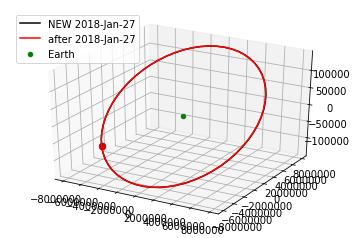

In [40]:
t_man = pk.epoch(6601, "mjd2000")
action = np.array([5, 10, 0])
satellite = maneuver(new_satellite, action, t_man)
ax = start_plot()
plot_planet(new_satellite, ax=ax, t0=t_man, legend=True, color="black")
plot_planet(satellite, ax=ax, t0=t_man, legend=True, color="red")
print(new_satellite)
print(satellite)

Planet Name: NEW
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2018-Jan-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 7154.6752521846111, 124.88532106719391]

Planet Name: after
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2183207498417101e-05
Eccentricity: 0.00116344644605056
Inclination (deg.): 0.98722112192895539
Big Omega (deg.): 359.44154665878943
Small omega (deg.): 305.86065052531001
Mean anomaly (deg.): -88.292409153502916
Elements reference epoch: 20

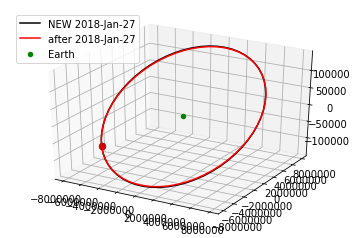

In [41]:
t_man = pk.epoch(6601, "mjd2000")
action = np.array([5, 0, 2])
satellite = maneuver(new_satellite, action, t_man)
ax = start_plot()
plot_planet(new_satellite, ax=ax, t0=t_man, legend=True, color="black")
plot_planet(satellite, ax=ax, t0=t_man, legend=True, color="red")
print(new_satellite)
print(satellite)

Planet Name: NEW
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2018-Jan-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 7154.6752521846111, 124.88532106719391]

Planet Name: after
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2023615711753209e-05
Eccentricity: 0.0033595563463274737
Inclination (deg.): 1.0011214469342367
Big Omega (deg.): 0.048135678688661809
Small omega (deg.): 11.489318602110679
Mean anomaly (deg.): -154.49570593873813
Elements reference epoch:

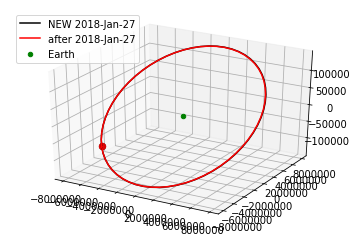

In [42]:
t_man = pk.epoch(6601, "mjd2000")
action = np.array([0, 10, 0])
satellite = maneuver(new_satellite, action, t_man)
ax = start_plot()
plot_planet(new_satellite, ax=ax, t0=t_man, legend=True, color="black")
plot_planet(satellite, ax=ax, t0=t_man, legend=True, color="red")
print(new_satellite)
print(satellite)

Planet Name: NEW
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2018-Jan-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 7154.6752521846111, 124.88532106719391]

Planet Name: after
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2227567150766665e-05
Eccentricity: 0.001932380002580733
Inclination (deg.): 1.0000000000002647
Big Omega (deg.): 0
Small omega (deg.): 279.79665047244271
Mean anomaly (deg.): -62.723017114466458
Elements reference epoch: 2018-Jan-27 00:00:0

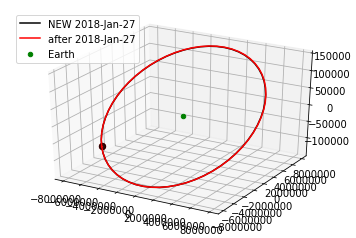

In [43]:
t_man = pk.epoch(6601, "mjd2000")
action = np.array([10, 0, 0])
satellite = maneuver(new_satellite, action, t_man)
ax = start_plot()
plot_planet(new_satellite, ax=ax, t0=t_man, legend=True, color="black")
plot_planet(satellite, ax=ax, t0=t_man, legend=True, color="red")
print(new_satellite)
print(satellite)

Planet Name: NEW
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2139779556830672e-05
Eccentricity: 0.001
Inclination (deg.): 1
Big Omega (deg.): 0
Small omega (deg.): 0
Mean anomaly (deg.): 0
Elements reference epoch: 2018-Jan-26 00:00:00
Ephemerides type: Keplerian
r at ref. = [7792200, 0, 0]
v at ref. = [0, 7154.6752521846111, 124.88532106719391]

Planet Name: after
Own gravity parameter: 0.10000000000000001
Central body gravity parameter: 398600800000000
Planet radius: 0.10000000000000001
Planet safe radius: 0.10000000000000001
Keplerian planet elements: 
Semi major axis (AU): 5.2137847701945232e-05
Eccentricity: 0.0010385160543588865
Inclination (deg.): 0.93707996137935012
Big Omega (deg.): 357.0558115817812
Small omega (deg.): 3.5260179813720844
Mean anomaly (deg.): -143.63515774981423
Elements reference epoch: 2

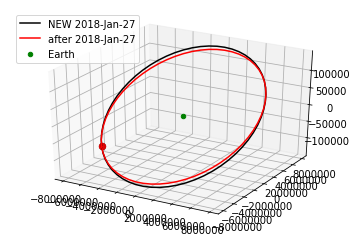

In [44]:
t_man = pk.epoch(6601, "mjd2000")
action = np.array([0, 0, 10])
satellite = maneuver(new_satellite, action, t_man)
ax = start_plot()
plot_planet(new_satellite, ax=ax, t0=t_man, legend=True, color="black")
plot_planet(satellite, ax=ax, t0=t_man, legend=True, color="red")
print(new_satellite)
print(satellite)